# Linear Discriminant Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

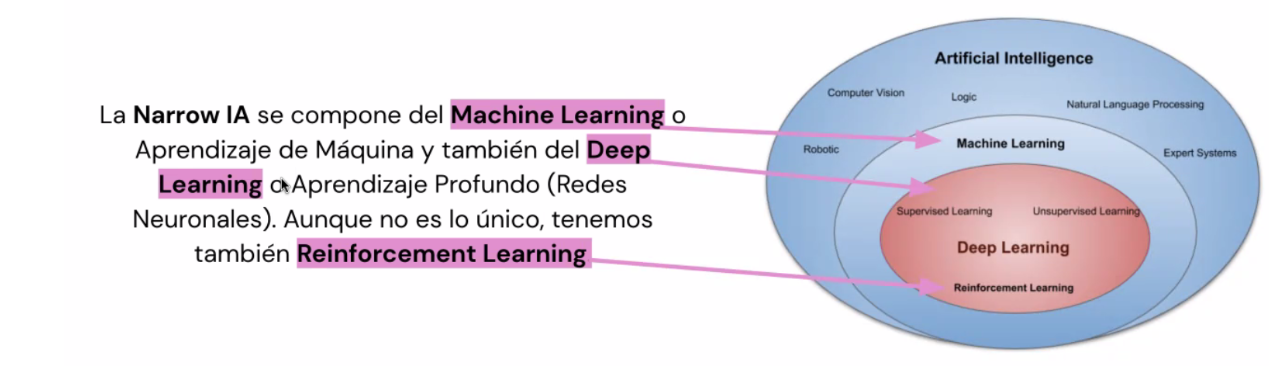

## Leer el dataset

In [2]:
#Recordar json es el tipo de archivo de java 
iris = pd.read_json('iris.json')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepalLength    150 non-null float64
sepalWidth     150 non-null float64
petalLength    150 non-null float64
petalWidth     150 non-null float64
species        150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 4 Variables predictoras o features, 3 clases con 50 instancias cada una

## Variable de respuesta: la especie de la flor

In [4]:
iris.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Separar las clases para visualizarlas

In [5]:
setosa = iris[0:50]
setosa.head(2)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [6]:
versicolor = iris[50:100]
versicolor.head(2)

,sepalLength,sepalWidth,petalLength,petalWidth,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [7]:
virginica =iris[100:150]
virginica.head(2)

,sepalLength,sepalWidth,petalLength,petalWidth,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


## Gráfica de largo y ancho de los sépalos

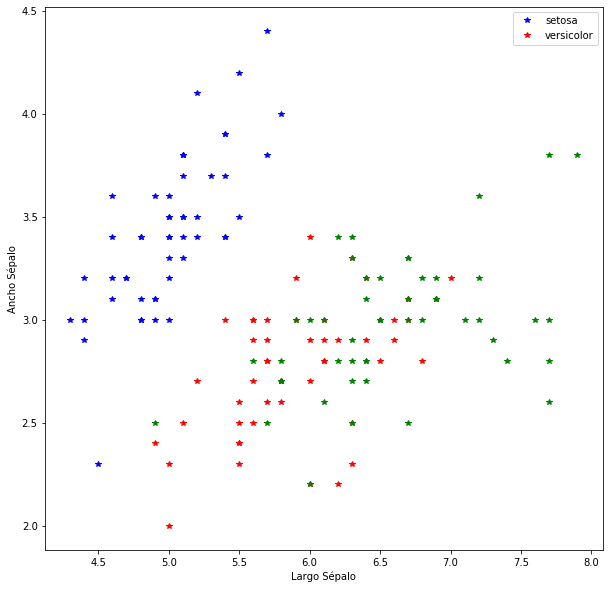

In [8]:
plt.figure(figsize=(10,10))
plt.plot(setosa.values[:,0],setosa.values[:,1],'*',color = 'blue')
plt.plot(versicolor.values[:,0],versicolor.values[:,1],'*',color = 'red')
plt.plot(virginica.values[:,0],virginica.values[:,1],'*',color = 'green')
plt.xlabel("Largo Sépalo")
plt.ylabel("Ancho Sépalo")
plt.legend(['setosa','versicolor'])

## Visualización en 3D

<IPython.core.display.Javascript object>


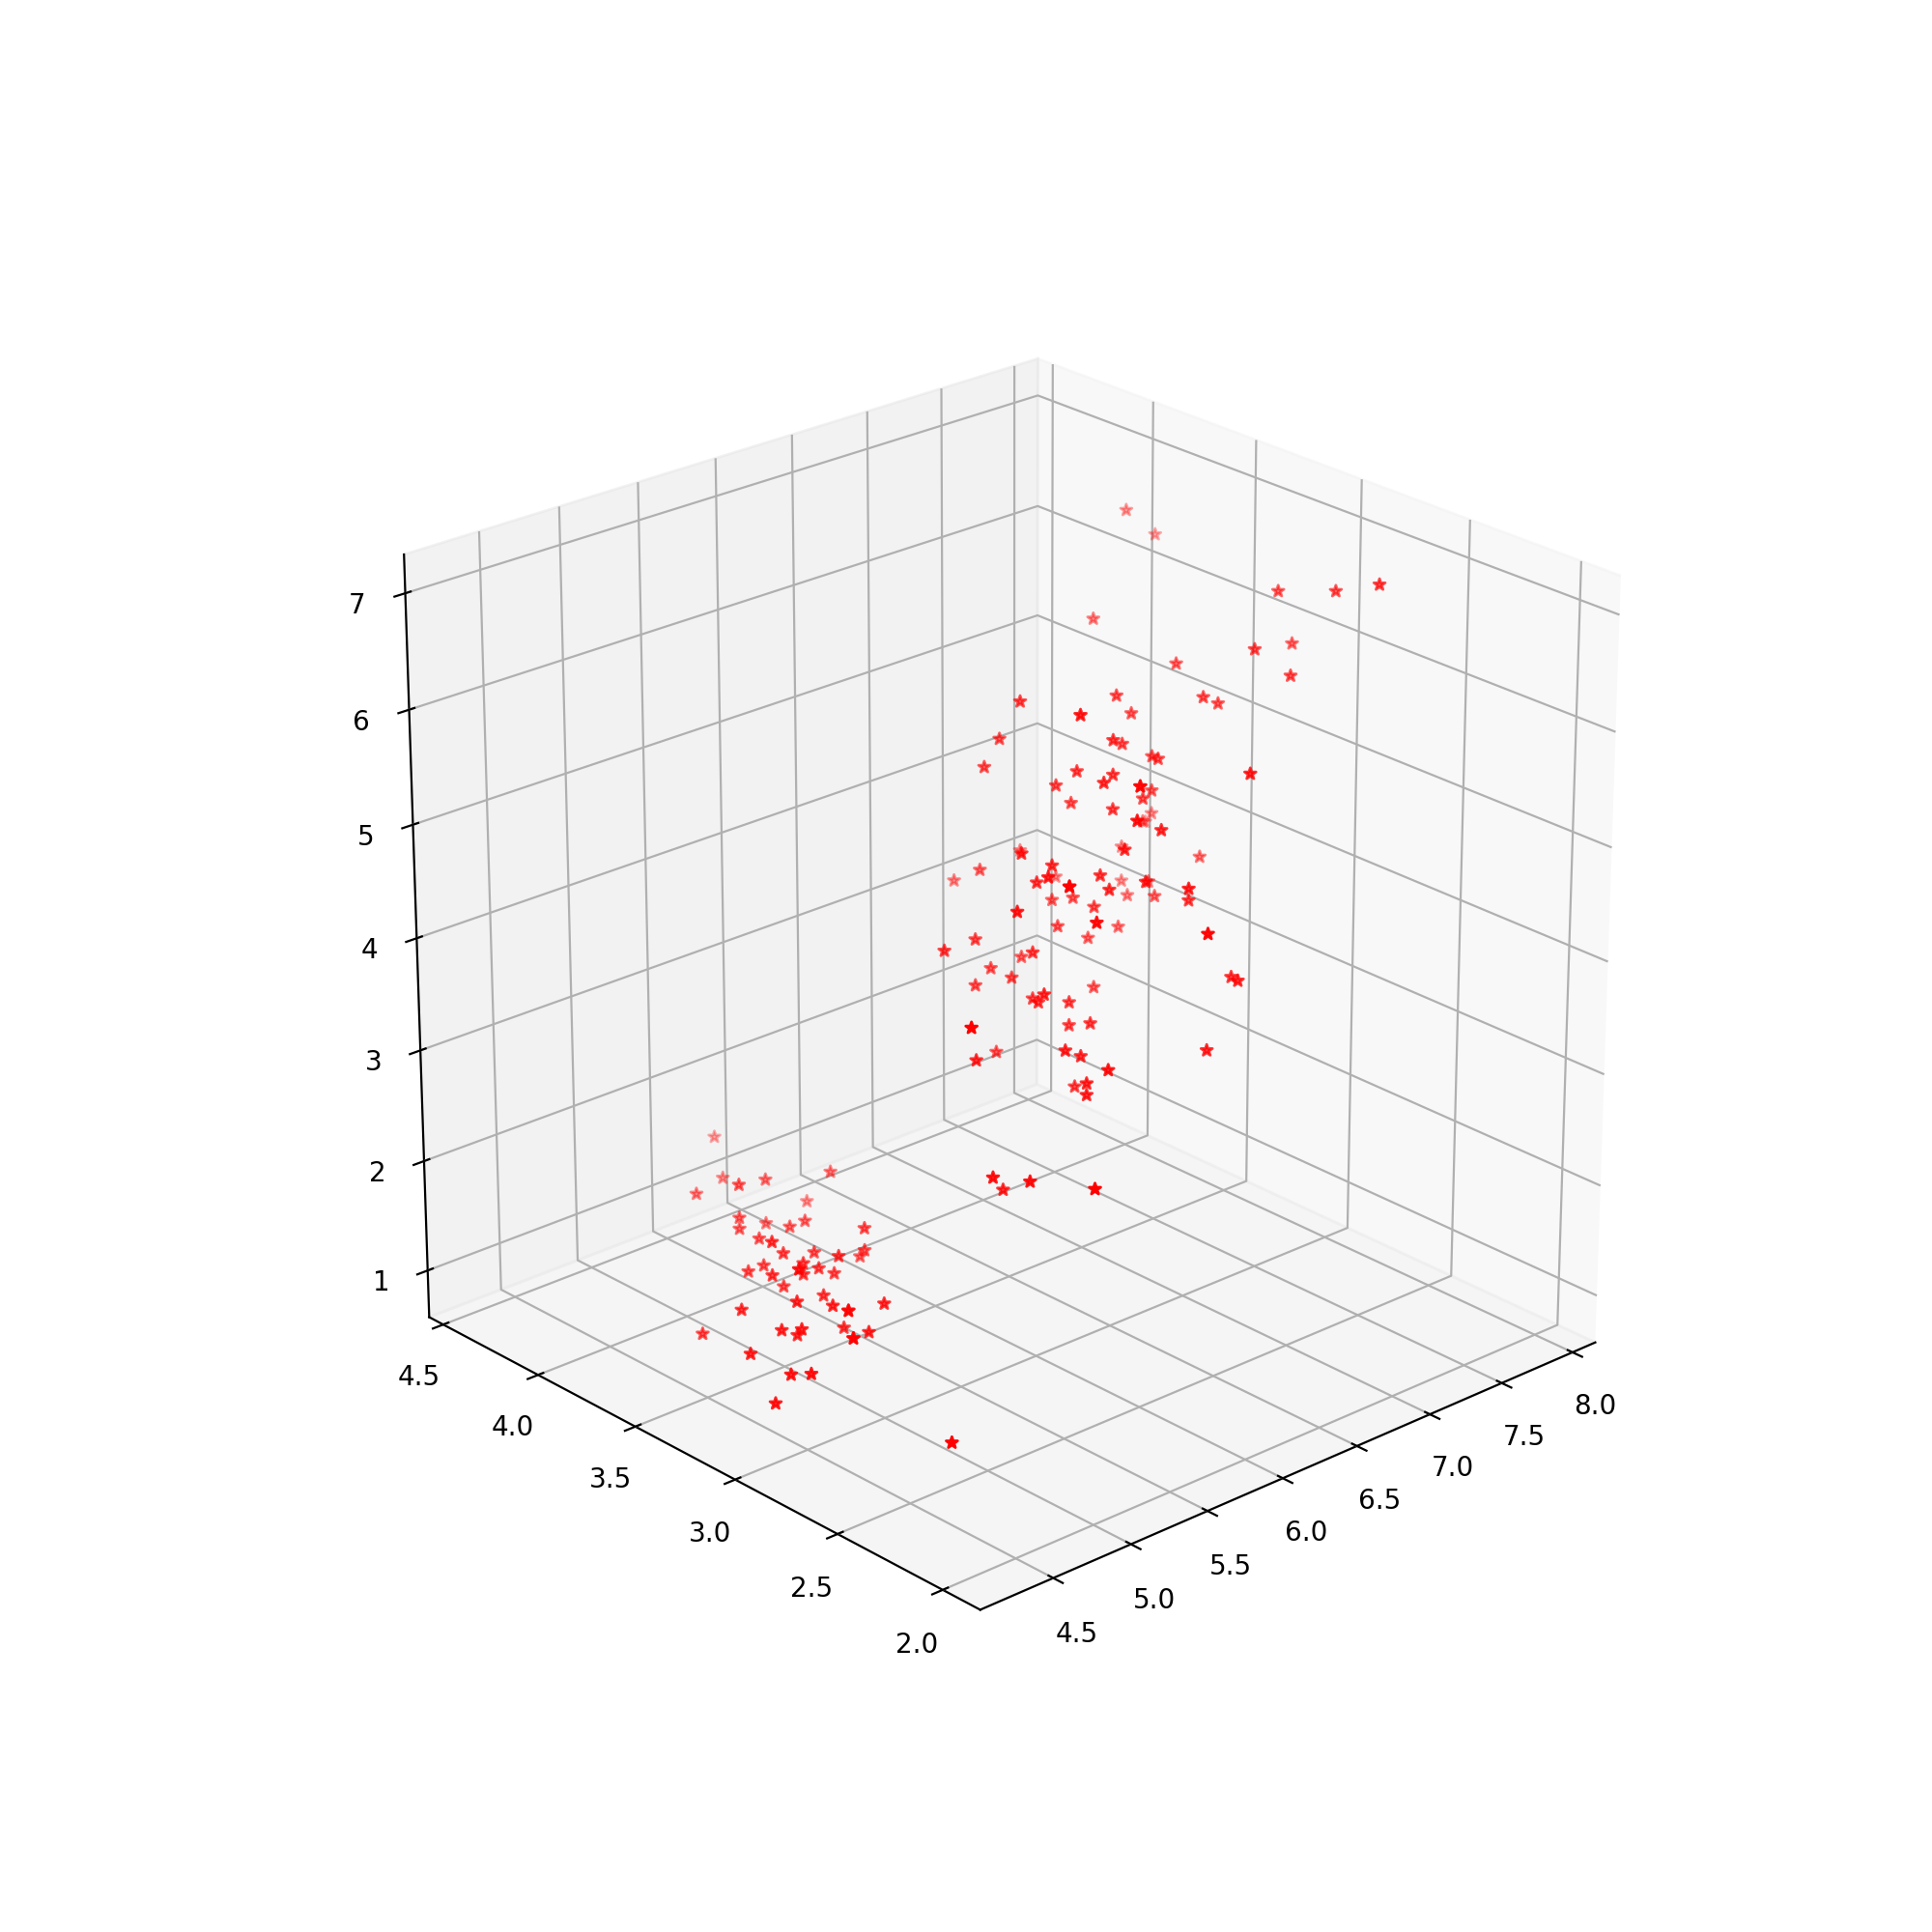

In [12]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(versicolor.values[:,0].astype(float), versicolor.values[:,1].astype(float),
           versicolor.values[:,2].astype(float), '*',marker = '*',color = 'red')
ax.scatter(setosa.values[:,0].astype(float), setosa.values[:,1].astype(float),
           setosa.values[:,2].astype(float), marker = '*',color = 'red')
ax.scatter(virginica.values[:,0].astype(float), virginica.values[:,1].astype(float),
           virginica.values[:,2].astype(float), marker = '*',color = 'red')
plt.show()

## Función de densidad conjunta

<IPython.core.display.Javascript object>


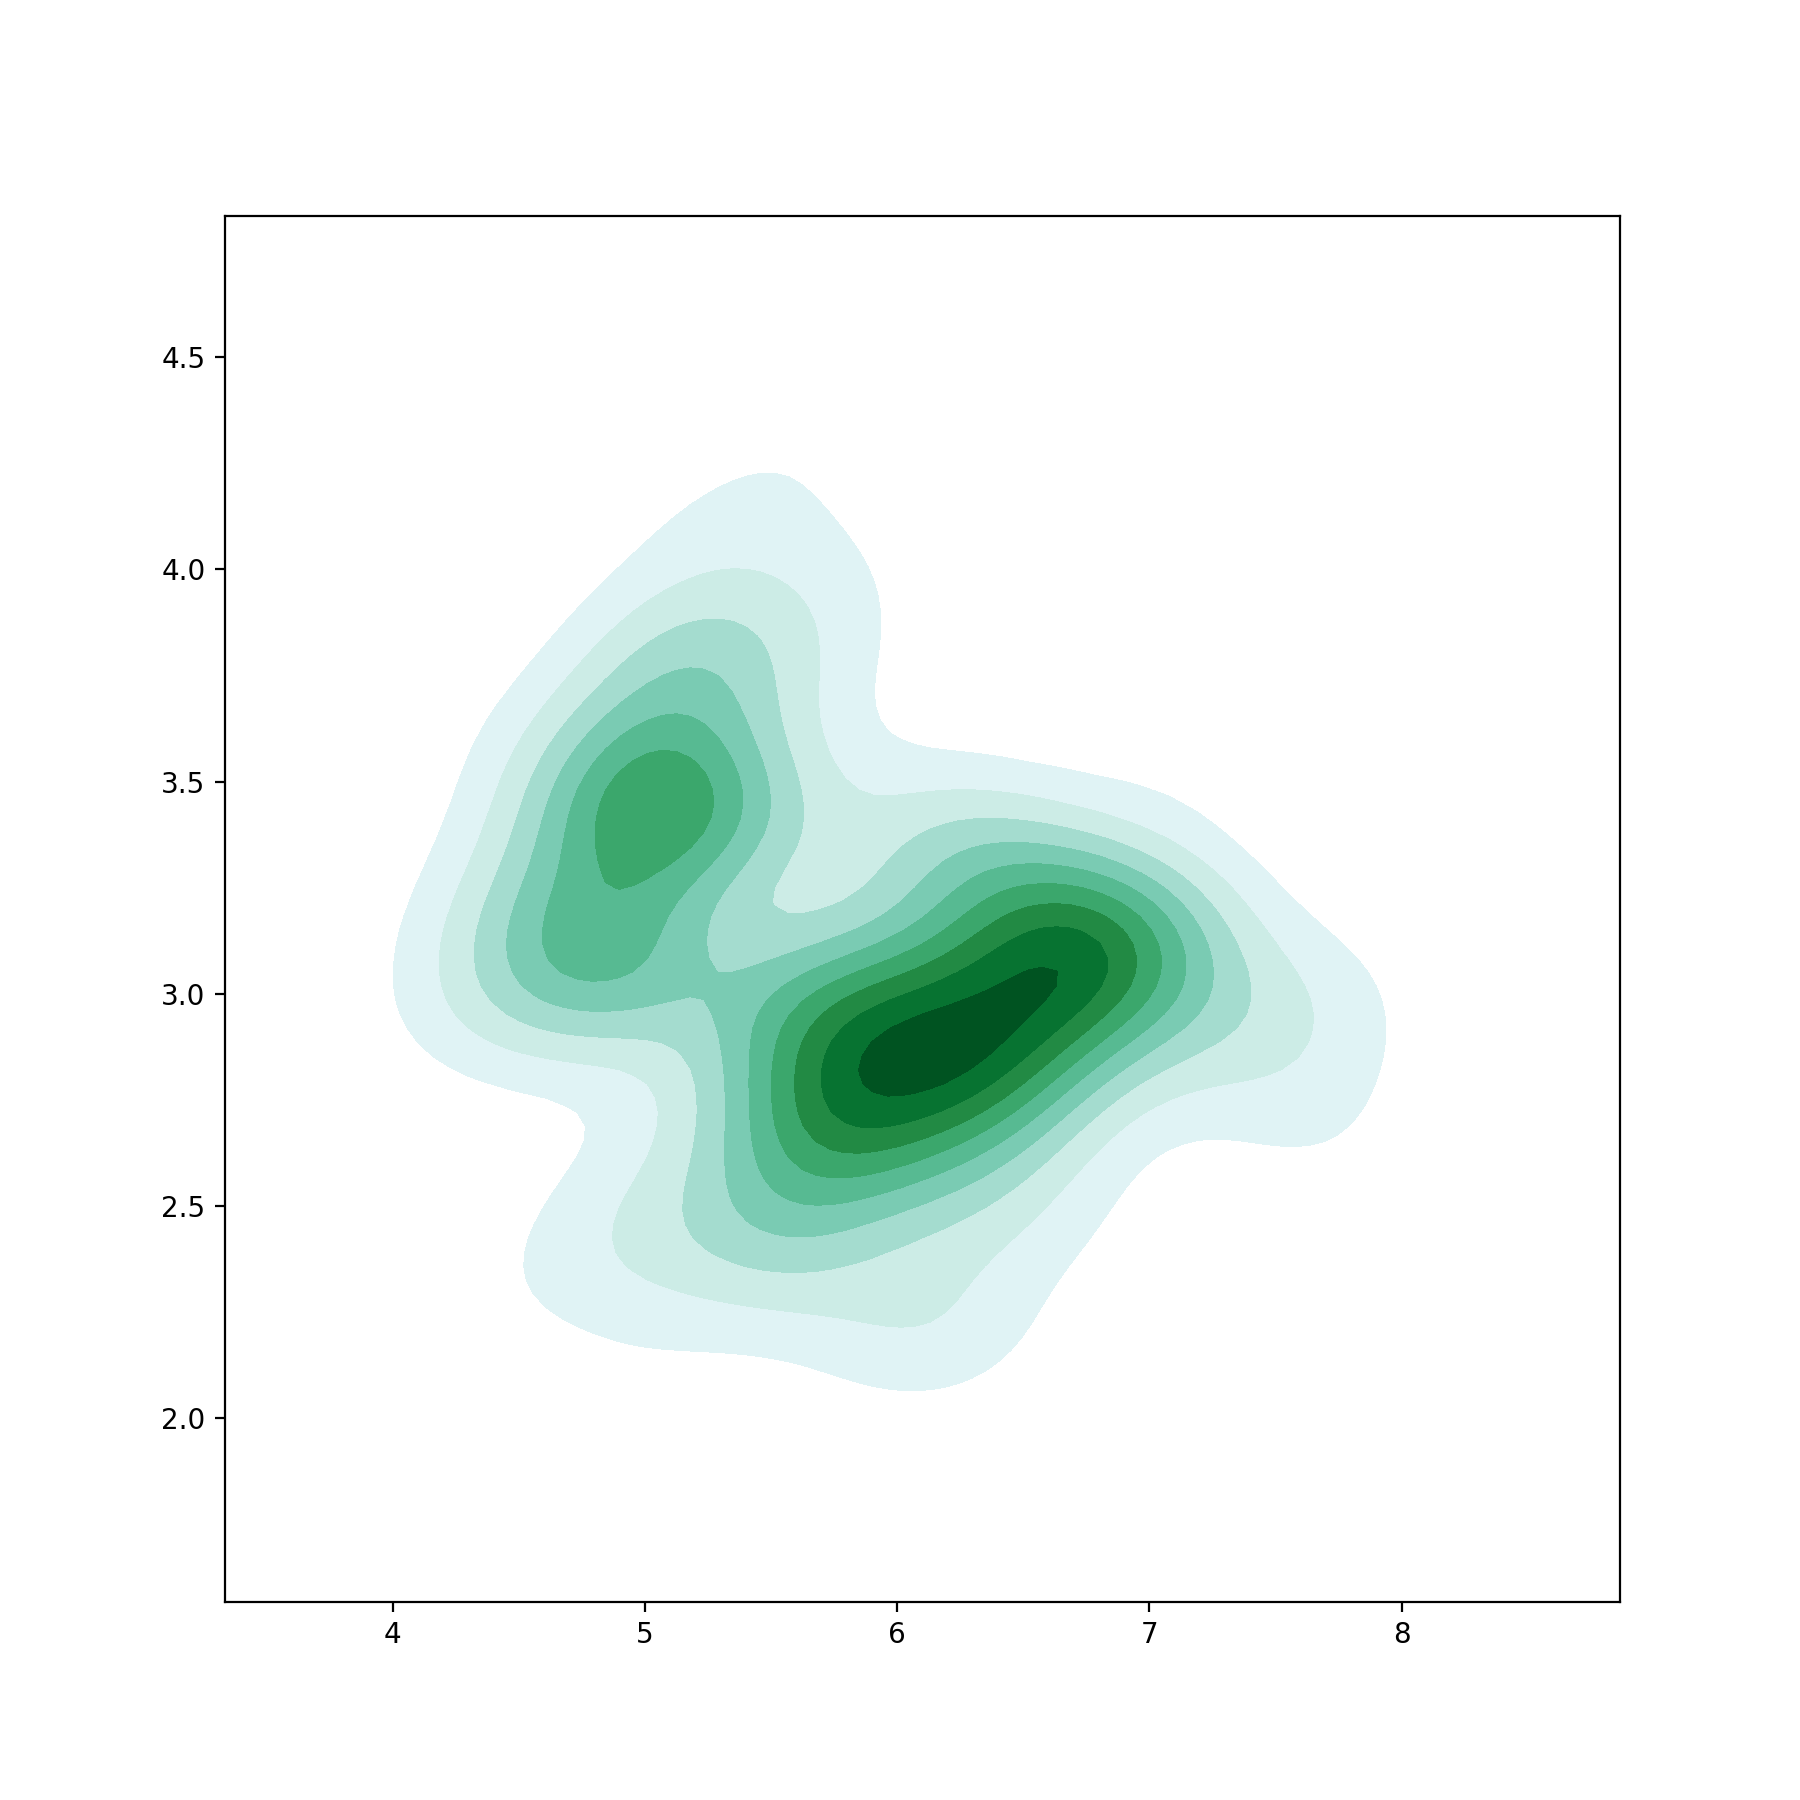

In [9]:
f, axes = plt.subplots(1, figsize=(9, 9), sharex=True, sharey=True)

sns.kdeplot(iris.values[:,0],iris.values[:,1],cmap = 'BuGn',shade=True, shade_lowest=False)

<IPython.core.display.Javascript object>


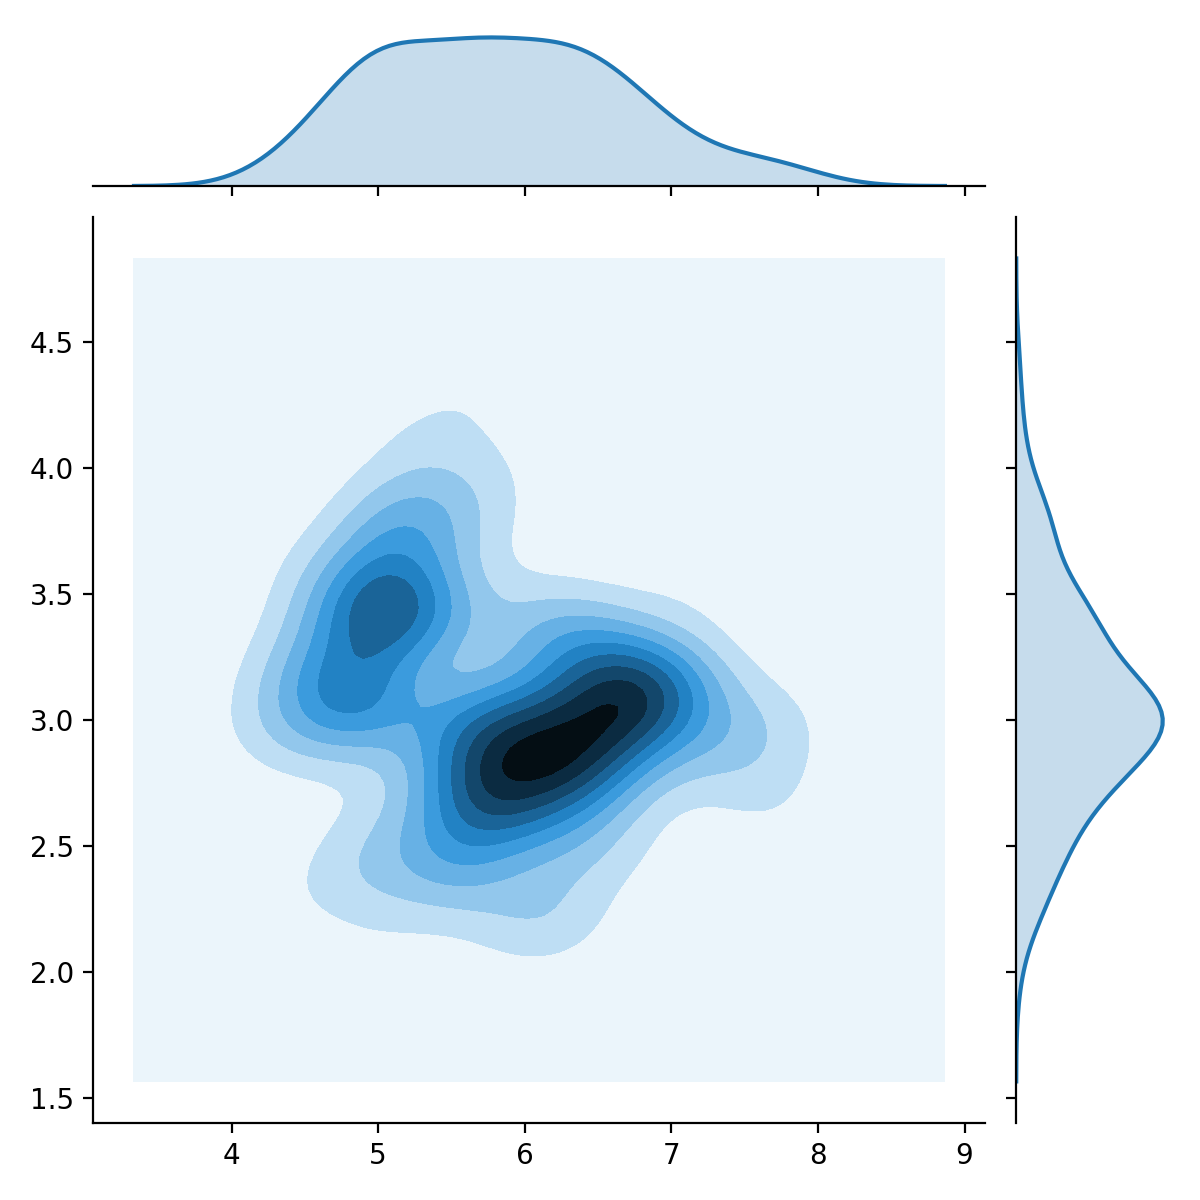

In [10]:
sns.jointplot(x = iris.values[:,0],y = iris.values[:,1], kind="kde");

## Funciones de densidad condicionales

<IPython.core.display.Javascript object>


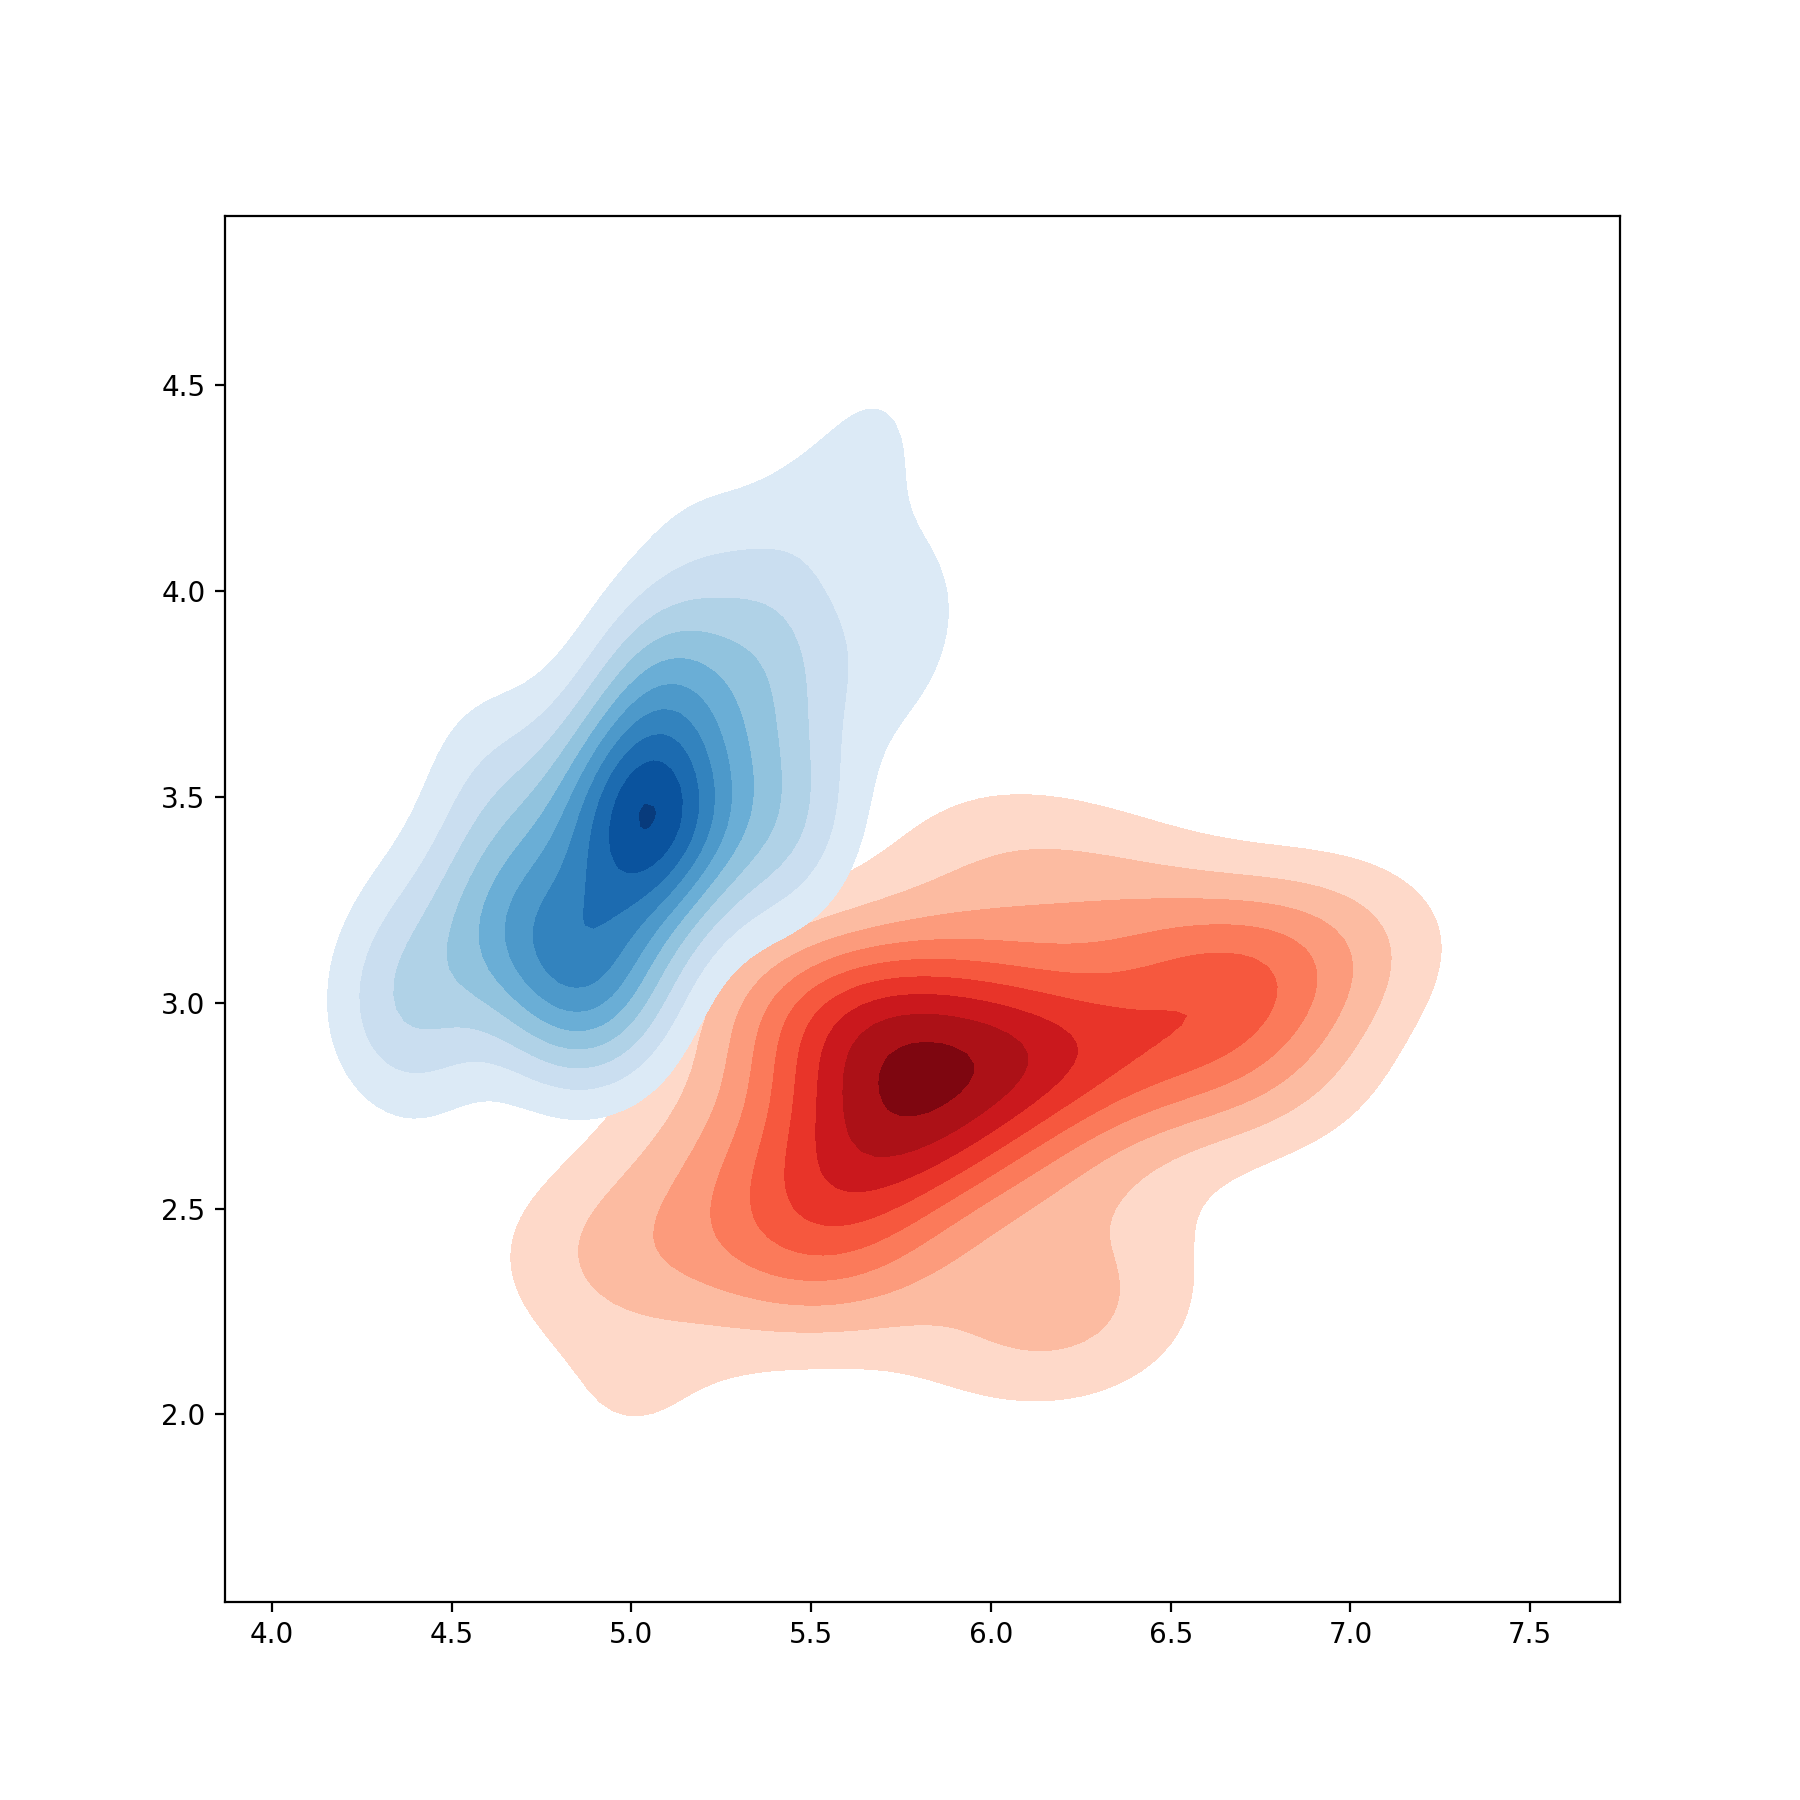

In [11]:
f, axes = plt.subplots(1, figsize=(9, 9), sharex=True, sharey=True)

sns.kdeplot(versicolor.values[:,0],versicolor.values[:,1],cmap = 'Reds',shade=True, shade_lowest=False)

sns.kdeplot(setosa.values[:,0],setosa.values[:,1],cmap = 'Blues',shade=True, shade_lowest=False)

#sns.kdeplot(virginica.values[:,0],virginica.values[:,1],cmap = 'Greens',shade=True, shade_lowest=False)


<IPython.core.display.Javascript object>


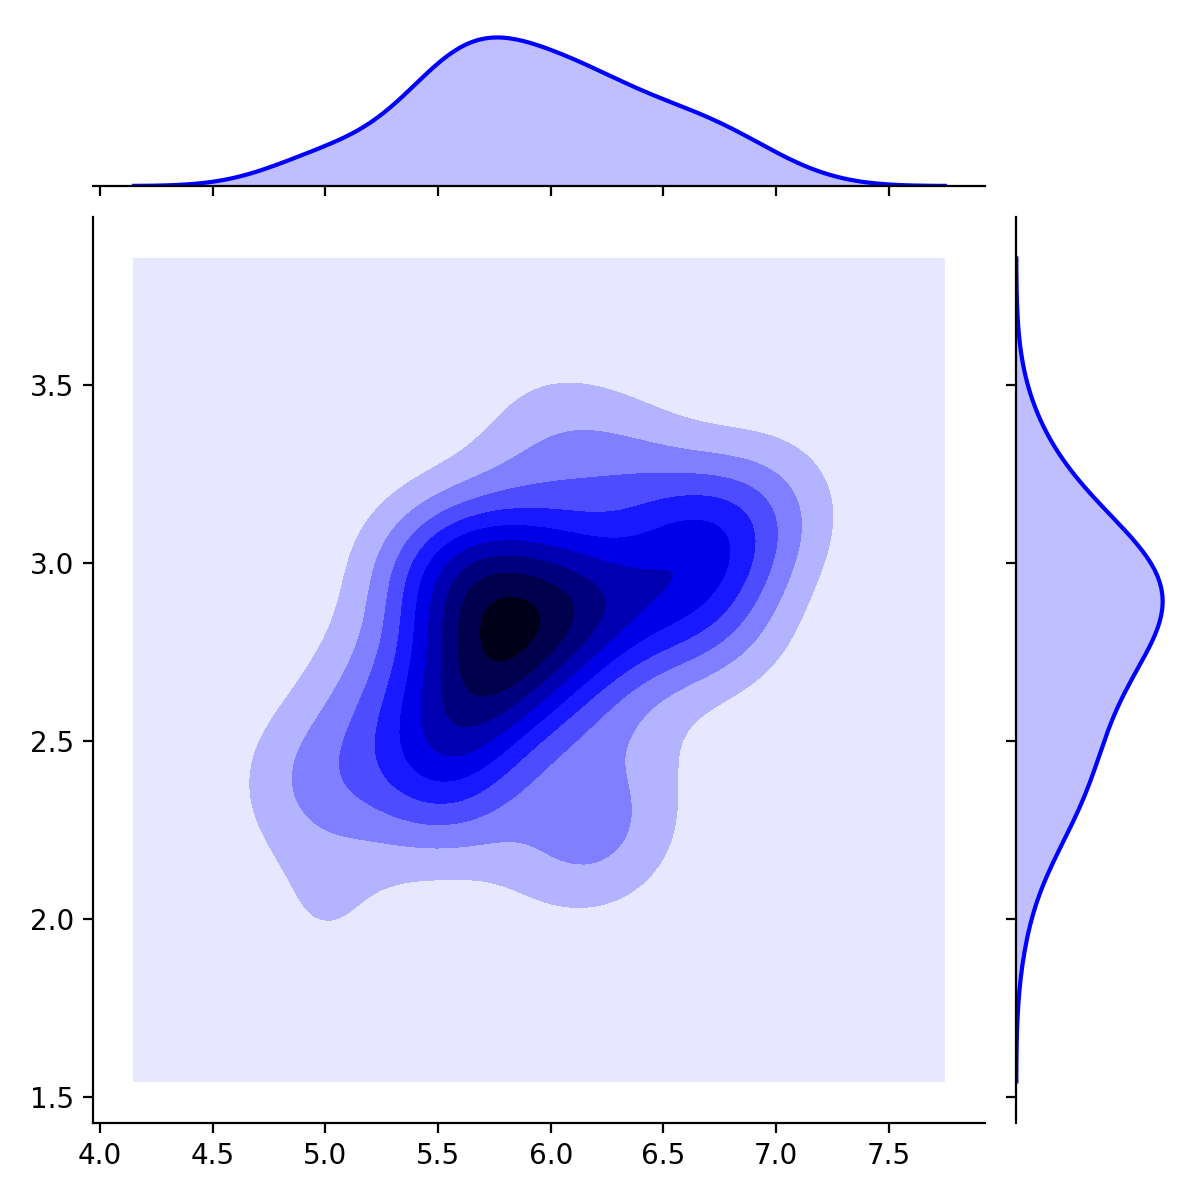

<IPython.core.display.Javascript object>


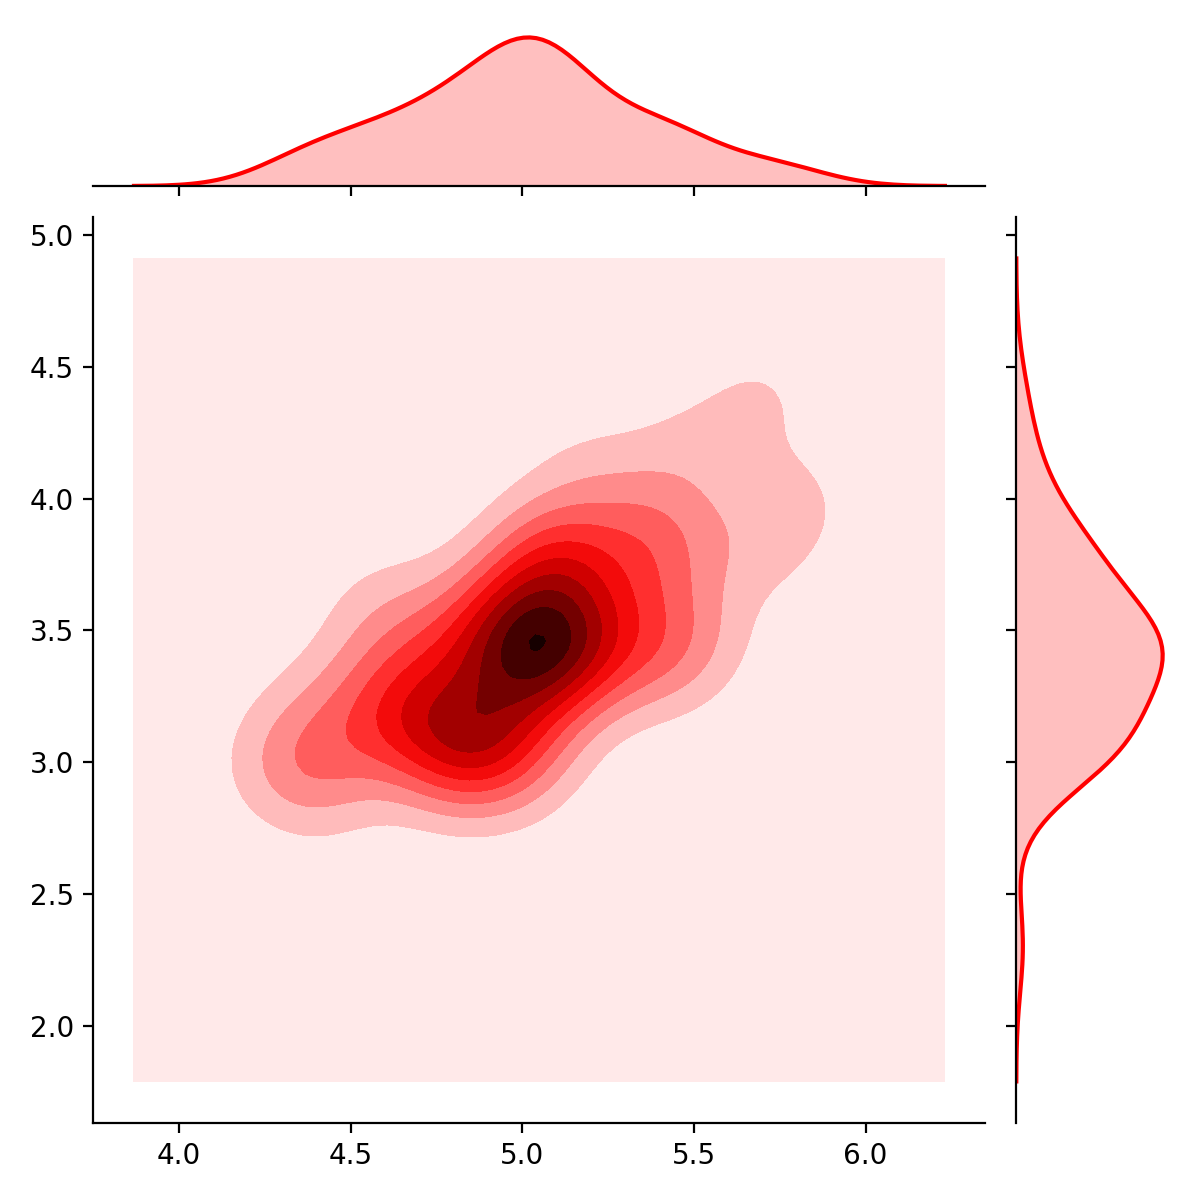

<IPython.core.display.Javascript object>


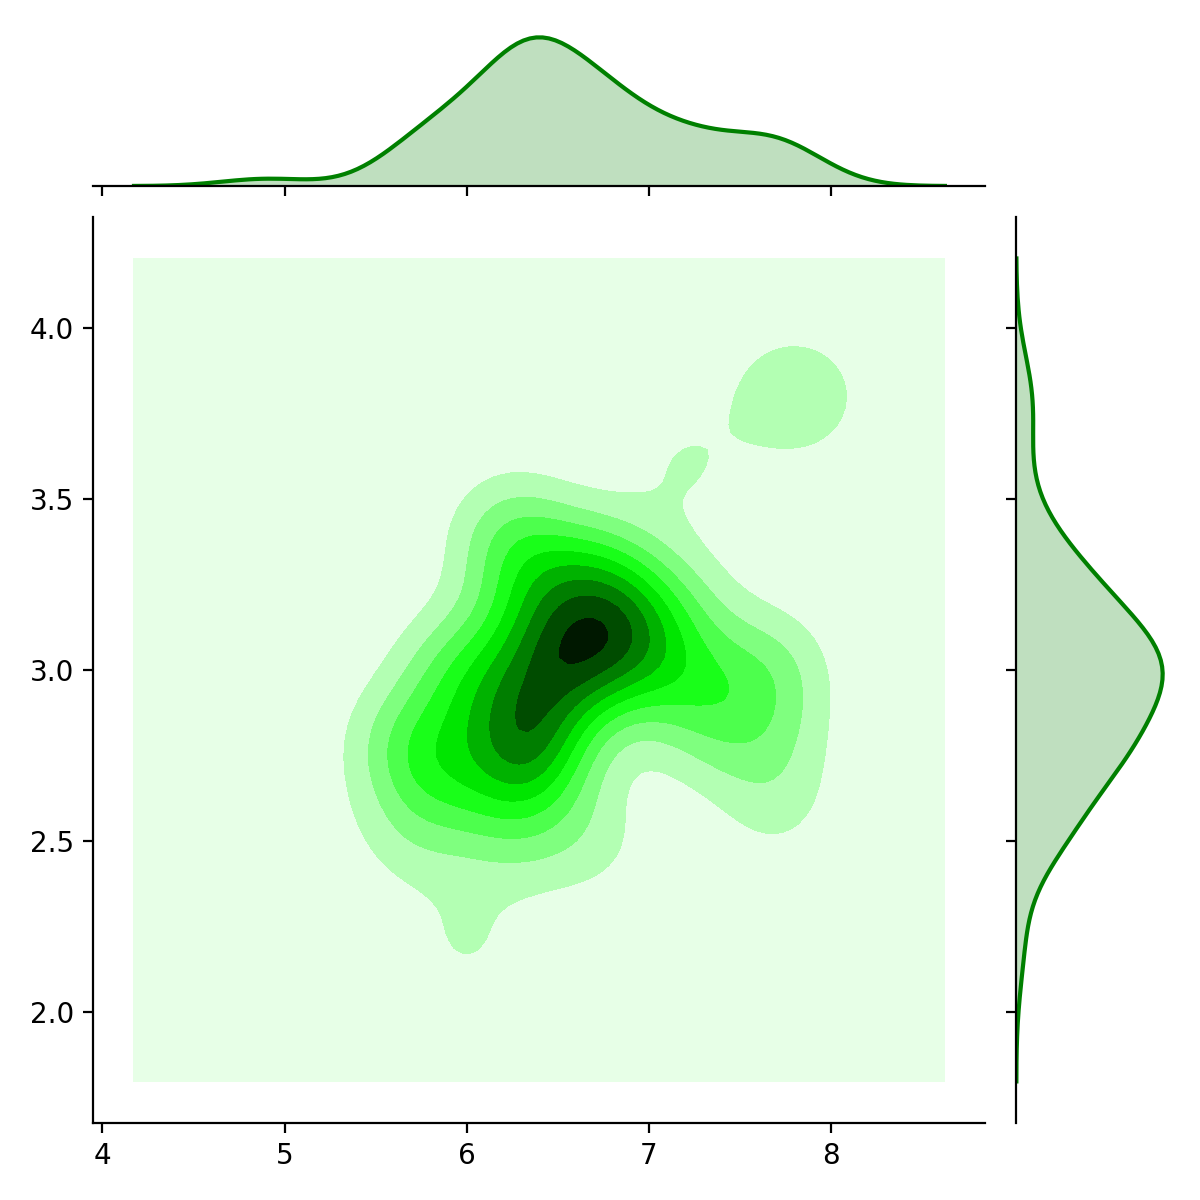

In [12]:
sns.jointplot(x = versicolor.values[:,0],y = versicolor.values[:,1], kind="kde",color = 'b');
sns.jointplot(x = setosa.values[:,0],y = setosa.values[:,1], kind="kde",color = 'r');
sns.jointplot(x = virginica.values[:,0],y = virginica.values[:,1], kind="kde",color  ='g');


# Las mates

In [13]:
iris[0:100]

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


$\pi_k$: Probabilidad de pertenecer a la clase $k$

$\pi_l$: Probabilidad de pertenecer a la clase $l$

$f_{X|C=k}  = f_k(x)$: Función de densidad de la población de los objetos de la clase $k$

$f_{X|C=l} = f_l(x)$: Función de densidad de la población de los objetos de la clase $l$

Con:  $ \pi_k + \pi_l  = 1$

$P(C = k| X = x) = \frac{f_k(x)\pi_k}{f_x(X)} = \frac{f_k(x)\pi_k}{f_k(x)\pi_k + f_l(x)\pi_l} $

$P(C = l| X = x) = \frac{f_k(x)\pi_k}{f_x(X)} = \frac{f_l(x)\pi_l}{f_k(x)\pi_k + f_l(x)\pi_l} $

En general para K clases

$P(C=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l=1}^K f_l(x)\pi_l} $

Con: $\sum_{l=1}^n \pi_l = 1$

Suponemos que las$f_k(x)$ son multinormales

$f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}e^{\frac{-1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}$

Comparando la probabilidad de pertencer a la clase $K$ o a la clase $l$

$\frac{P(C=k|X=x)}{P(C=l|X=x)} = \frac{\frac{\pi_k}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}e^{\frac{-1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}}{\frac{\pi_l}{(2\pi)^{p/2}|\Sigma_l|^{1/2}}e^{\frac{-1}{2}(x-\mu_l)^T\Sigma_l^{-1}(x-\mu_l)}}$

LDA hace la suposición que las matrices de covarianza son iguales en todas las clases, es decir $\Sigma_k = \Sigma_l$

$\frac{P(C=k|X=x)}{P(C=l|X=x)} =  \frac{\pi_ke^{\frac{-1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}}{\pi_le^{\frac{-1}{2}(x-\mu_l)^T\Sigma_l^{-1}(x-\mu_l)}}  = \frac{\pi_k}{\pi_l}e^{\frac{-1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+{\frac{1}{2}(x-\mu_l)^T\Sigma_k^{-1}(x-\mu_l)}}$

Si $\frac{P(C=k|X=x)}{P(C=l|X=x)}$ > 1 Deberíamos clasificar como $k$, en caso contrario como $l$

Si tomamos $ln{\frac{P(C=k|X=x)}{P(C=l|X=x)}}$ Si es mayor que 0 clasificamos como $k$, en caso contrario como $l$

$ln{\frac{\pi_k}{\pi_l}}+\frac{-1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+{\frac{1}{2}(x-\mu_l)^T\Sigma_k^{-1}(x-\mu_l)}$

$ln{\frac{\pi_k}{\pi_l}} + \frac{-1}{2}(x^T\Sigma_k^{-1}x-x^T\Sigma_k^{-1}\mu_k-\mu_k^T\Sigma_k^{-1}x+\mu_k^T\Sigma_k^{-1}\mu_k) + \frac{1}{2}(x^T\Sigma_k^{-1}x-x^T\Sigma_k^{-1}\mu_l-\mu_l^T\Sigma_k^{-1}x+\mu_l^T\Sigma_k^{-1}\mu_l)$

$ln{\frac{\pi_k}{\pi_l}}+ x^T\Sigma_k^{-1}(\mu_k-\mu_l)-\frac{1}{2}(\mu_k+\mu_l)\Sigma_k^{-1}(\mu_k-\mu_l) $

### Estimación de los parámetros

$\pi_k = \frac{N_k}{N}$

$\mu_k = \sum \frac{x_i}{N_k}, x_i \in k$

$\Sigma =  \sum_{k=1}^K \sum (x_i-\mu_k)(x_i-\mu_k)^T/(N-K)$

# Implementación

## Preparar datos

In [14]:
setosa = setosa.drop(columns = ['species'])
versicolor = versicolor.drop(columns = ['species'])
y = np.zeros(100)
y[50:100] = 1

In [15]:
setosa.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
versicolor.head()

,sepalLength,sepalWidth,petalLength,petalWidth
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5


In [17]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
X = np.append(setosa.values,versicolor.values,axis = 0)

## Partir el conjunto de datos en entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
y_test.shape

(30,)

## Estimar parámetros del LDA

$N$ Número de datos en el conjunto de entrenamiento

$N_k$ Número de datos de la clase $k$

$N_l$ Número de datos de la clase $l$

In [22]:
N = len(y_train)
NL = y_train.sum()
NK = N-NL

In [23]:
NL

37.0

$\pi_k$ Probabilidad (a priori) de pertenecer a la clase $k$

$\pi_l$ Probabilidad (a priori) de pertenecer a la clase $l$

In [24]:
𝜋𝑘 = NK/N
𝜋l = NL/N

print(𝜋𝑘)
print(𝜋l)

0.4714285714285714
0.5285714285714286


$x_k$ Instancias de la clase $k$

$x_l$ Instancias de la clase $l$

In [25]:
xk = X_train[y_train == 0]
xl = X_train[y_train == 1]

$\mu_k$ Vector de medias de la clase $k$

$\mu_l$ Vector de medias de la clase $l$

In [26]:
𝜇𝑘 = xk.sum(axis = 0)/NK
𝜇l = xl.sum(axis = 0)/NL

In [27]:
𝜇𝑘

array([4.96969697, 3.38484848, 1.46060606, 0.24242424])

In [28]:
K = np.zeros([xk.shape[1],xk.shape[1]])
K

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

$\Sigma$ Matriz de covarianza

In [29]:
K = np.zeros([xk.shape[1],xk.shape[1]])
L = A = np.zeros([xl.shape[1],xl.shape[1]])

In [30]:
L

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [31]:
L

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [32]:
xk_𝜇𝑘 = xk-𝜇𝑘
for i in range(0,int(NK)):
    K+=np.outer((xk_𝜇𝑘)[i],(xk_𝜇𝑘)[i])

In [33]:
xk_𝜇𝑘 

array([[-0.16969697,  0.01515152,  0.13939394, -0.04242424],
       [-0.36969697, -0.18484848, -0.06060606, -0.04242424],
       [ 0.23030303,  0.01515152, -0.06060606, -0.04242424],
       [ 0.43030303,  0.51515152,  0.23939394,  0.15757576],
       [ 0.03030303, -0.18484848, -0.26060606, -0.04242424],
       [ 0.43030303,  0.51515152, -0.16060606,  0.15757576],
       [ 0.03030303, -0.08484848, -0.06060606, -0.04242424],
       [-0.06969697, -0.28484848,  0.03939394, -0.04242424],
       [ 0.03030303,  0.01515152,  0.03939394, -0.04242424],
       [ 0.23030303,  0.11515152,  0.03939394, -0.04242424],
       [ 0.13030303,  0.41515152,  0.03939394,  0.05757576],
       [ 0.03030303, -0.38484848,  0.13939394, -0.04242424],
       [-0.66969697, -0.38484848, -0.36060606, -0.14242424],
       [-0.16969697,  0.01515152,  0.43939394, -0.04242424],
       [-0.36969697, -0.28484848,  0.03939394, -0.04242424],
       [ 0.13030303,  0.11515152, -0.06060606,  0.05757576],
       [-0.56969697, -0.

In [34]:
xl_𝜇l = xl-𝜇l
for i in range(0,int(NL)):
    L+=np.outer((xl_𝜇l)[i],(xl_𝜇l)[i])

In [35]:
Σ = (K+L)/(N-2)

In [36]:
Σ_1 = np.linalg.inv(Σ)

In [37]:
Σ

array([[0.21294864, 0.09824698, 0.11053753, 0.03419304],
       [0.09824698, 0.12283374, 0.05824373, 0.02673086],
       [0.11053753, 0.05824373, 0.12572144, 0.03928879],
       [0.03419304, 0.02673086, 0.03928879, 0.0246512 ]])

In [38]:
Σ_1

array([[ 11.00034104,  -5.78061032,  -8.33646896,   4.29656011],
       [ -5.78061032,  14.15233608,   1.62595656,  -9.91957125],
       [ -8.33646896,   1.62595656,  22.84747461, -26.61386258],
       [  4.29656011,  -9.91957125, -26.61386258,  87.77960566]])

## Predicción

In [39]:
pred = np.zeros(y_test.shape[0])
for i in range(0,y_test.shape[0]):
    if 0<math.log(𝜋𝑘/𝜋l)-(𝜇𝑘+𝜇l)@Σ_1@(𝜇𝑘-𝜇l)+X_test[i]@Σ_1@(𝜇𝑘-𝜇l):
        print(math.log(𝜋𝑘/𝜋l)-(𝜇𝑘+𝜇l)@Σ_1@(𝜇𝑘-𝜇l)/2+X_test[i]@Σ_1@(𝜇𝑘-𝜇l))
        continue
    else:
        pred[i] = 1

45.70148262861295
47.63253093410989
55.67773372648813
70.12017937720981
62.947263796133605
60.177226374729905
58.072460751746014
45.939143938061896
75.96123192264014
61.81491554377006
51.99217826371201
50.5652693726516
46.52523461218746
53.805780982181865
72.04782994852395
59.10819451554033
51.94629523481306


In [40]:
pred

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.])

In [41]:
y_test

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.])

# Multi class

$ \delta_k(x) = x^T \Sigma^{-1}\mu_k  -\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + log(\pi_k)$ 


Esto para cada clase, se asigna la instancia a la clase con mayor probabilidad

# Quadratic Discriminat Analysis

$ -\frac{1}{2} log|\Sigma_k|-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) + log(\pi_k)$


# Regularized Discriminat Analysis

$\hat{\Sigma_k} = \alpha \hat{\Sigma_k}+ (1-\alpha)\hat{\Sigma}$

# Métricas

## Matriz de confusión

In [42]:
from sklearn.metrics import confusion_matrix


In [43]:
cm = confusion_matrix(y_test, pred)
cm

array([[17,  0],
       [ 0, 13]])

$ln\frac{P(y=0)}{P(y=1)}$


In [92]:
class LDA():
    def fit(self,X,y):
        self._estimator_type = "classifier"
        # Number of classes:
        self.classes_ = np.unique(y)
        self.K = len(self.classes_)
        # Dimension of the instances
        self.n = X.shape[1]
        # Number of instances
        self.m = X.shape[0]
        self.X = X.values
        
        # Prior probabilites
        self.𝜋 = np.zeros(self.K)
        # Mean vectors
        self.𝜇 = np.zeros([self.K,self.n])
        for i in range(self.K):
            # Calculate prior probabilities
            self.𝜋[i] = len(y[y == self.classes_[i]])/self.m
            # Calculate mean vectors
            self.𝜇[i] = X[y == i].mean(axis=0)
            
        # Covariance matrix
        self.Σ = np.zeros([X.shape[1],X.shape[1]])
        for j in range(self.K):
            X_j=X_train[y_train == j]
            for i in range(len(X_j)):
                self.Σ+=np.outer(X_j.values[i]-lda.𝜇[j], X_j.values[i]-lda.𝜇[j])
        self.Σ /=(self.m-self.K)
        self.Σ_1 = np.linalg.inv(self.Σ)
        
   
    def predict(self,X):
        X = X.values
        self.discriminant=pd.DataFrame()   
        for i in range(self.K):
            self.discriminant[i] = X@self.Σ_1@self.𝜇[i] - 0.5*self.𝜇[i]@self.Σ_1@self.𝜇[i]+np.log(self.𝜋[i])
            
        return self.discriminant.idxmax(axis=1)
            
       

In [93]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
le = preprocessing.LabelEncoder()
iris = pd.read_json('iris.json')
y = iris['species']
y = le.fit_transform(y)
X = iris.drop(['species'],axis=1)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [95]:
lda = LDA()

In [96]:
lda.fit(X_train,y_train)

In [97]:
preds = lda.predict(X_test)

In [98]:
preds.values

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

<IPython.core.display.Javascript object>


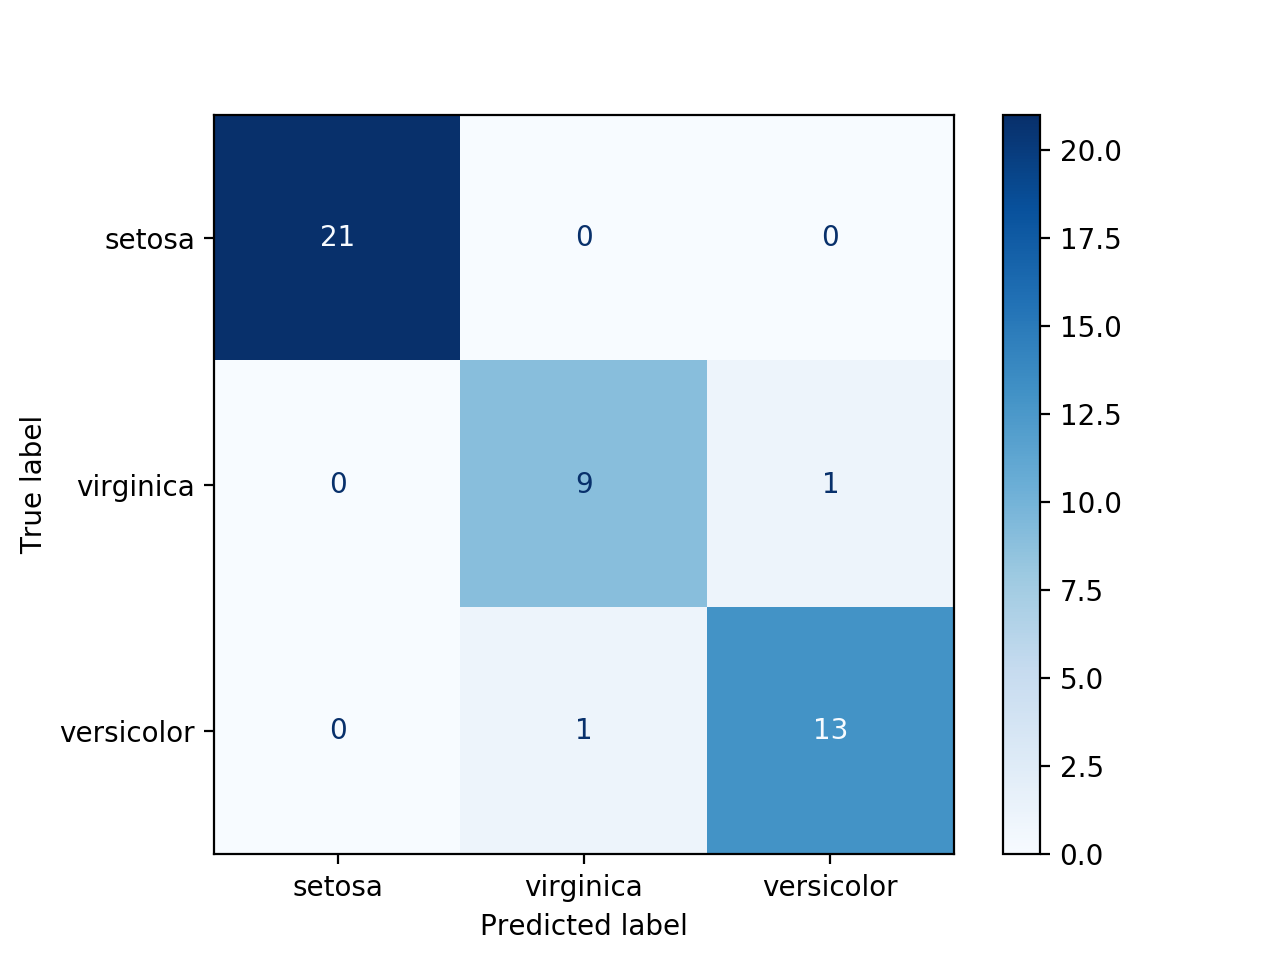

In [111]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lda,X_test,y_test,cmap = 
                      plt.cm.get_cmap("Blues"),display_labels=['setosa','virginica','versicolor'])